# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pwd

'/Users/gigijones/Documents/Berkeley Data Analytics/2_Completed_Week/Week6_PythonAPI/Homework_Challenge/WeatherPy'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
output_data_file2 = "output_data/clean_city_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Draw a sample from a uniform distribution 
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

In [ ]:
# API URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the identified city
city_data = []

# Create counters for the loop
record_count = 0
set_count = 1

for index, city in enumerate(cities):
    
    if (index % 50 == 0 and index >= 50):
        set_count = set_count + 1
        record_count = 0
    
    city_url = url + "&q=" + city
    if index == 0:
        print(city_url)
    
    print(f"Processing record {record_count} of set {set_count} | {city}")
    
    record_count += 1
    
       
    try:
        weather = requests.get(city_url).json()
        
        c_lat = weather["coord"]["lat"]
        c_lng = weather["coord"]["lon"]
        c_max_temp = weather["main"]["temp_max"]
        c_humidity = weather["main"]["humidity"]
        c_cloudiness = weather["clouds"]["all"]
        c_wind = weather["wind"]["speed"]
        c_country = weather["sys"]["country"]
        c_date = weather["dt"]

        city_data.append({"City": city,
                          "Lat": c_lat,
                          "Lng": c_lng,
                          "Max Temp": c_max_temp,
                          "Humidity": c_humidity,
                          "Cloudiness": c_cloudiness,
                          "Wind Speed": c_wind,
                          "Country": c_country,
                          "Date": c_date})
        
        
    except Exception as e:
        print(e)
        print(f"The {city} is not found. Skipping...")
        pass
    
print("-------DATA RETRIVAL COMPLETE-------")

    





http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8a649adb9df0d966dd37da8a67c20e9d&q=bethel
Processing record 0 of set 1 | bethel
Processing record 1 of set 1 | new norfolk
Processing record 2 of set 1 | vaini
Processing record 3 of set 1 | souillac
Processing record 4 of set 1 | soe
Processing record 5 of set 1 | puerto ayora
Processing record 6 of set 1 | tabiauea
'coord'
The tabiauea is not found. Skipping...
Processing record 7 of set 1 | upernavik
Processing record 8 of set 1 | shimoda
Processing record 9 of set 1 | amderma
'coord'
The amderma is not found. Skipping...
Processing record 10 of set 1 | ajdabiya
Processing record 11 of set 1 | okandja
'coord'
The okandja is not found. Skipping...
Processing record 12 of set 1 | grindavik
Processing record 13 of set 1 | safwah
'coord'
The safwah is not found. Skipping...
Processing record 14 of set 1 | kaitangata
Processing record 15 of set 1 | rocha
Processing record 16 of set 1 | jamestown
Processing record 17 of s

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# Display the DataFrame
raw_city_data_df = pd.DataFrame(city_data)
raw_city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.0707,172.7902,80.56,77,99,14.88,KI,1611978915
1,gazalkent,41.5581,69.7708,41.00,33,90,11.50,UZ,1611978915
2,hermanus,-34.4187,19.2345,62.01,90,63,1.01,ZA,1611978916
3,vaini,-21.2000,-175.2000,80.60,89,90,14.97,TO,1611978916
4,pareora,-44.4871,171.2132,63.00,57,24,5.99,NZ,1611978916


In [16]:
raw_city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [17]:
# Export the df into a .csv

raw_city_data_df.to_csv('output_data/cities.csv', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
# Find the max humidity level to see if humidity is greater than 100%
# Answer is no
raw_city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,20.132654,19.681338,48.580000,72.604982,52.387900,8.352580,1.611979e+09
std,32.885450,89.834185,33.143034,18.910348,39.853641,5.755475,6.588838e+01
min,-54.800000,-179.166700,-43.650000,16.000000,0.000000,0.200000,1.611979e+09
25%,-6.824475,-62.893075,29.765000,62.000000,4.000000,3.655000,1.611979e+09
50%,23.425000,25.824200,59.410000,77.000000,60.000000,6.910000,1.611979e+09
75%,46.796300,100.297375,75.000000,86.000000,90.750000,11.515000,1.611979e+09
max,78.218600,176.633300,105.800000,100.000000,100.000000,27.630000,1.611979e+09


In [20]:
#  Get the indices of cities that have humidity over 100%.
bad_data = raw_city_data_df[(raw_city_data_df['Humidity']>100)].index
bad_data

Int64Index([], dtype='int64')

In [21]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_df = raw_city_data_df.drop(bad_data, inplace=False)
clean_city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.0707,172.7902,80.56,77,99,14.88,KI,1611978915
1,gazalkent,41.5581,69.7708,41.00,33,90,11.50,UZ,1611978915
2,hermanus,-34.4187,19.2345,62.01,90,63,1.01,ZA,1611978916
3,vaini,-21.2000,-175.2000,80.60,89,90,14.97,TO,1611978916
4,pareora,-44.4871,171.2132,63.00,57,24,5.99,NZ,1611978916
...,...,...,...,...,...,...,...,...,...
557,puerto narino,-3.7703,-70.3831,73.40,100,40,1.34,CO,1611979032
558,pran buri,12.3847,99.9098,84.20,58,91,9.22,TH,1611979032
559,steinbach,50.1667,8.5667,46.99,76,75,10.36,DE,1611979033
560,bafoulabe,13.8065,-10.8321,68.99,17,0,2.24,ML,1611979033


In [29]:
# Extract data from the data frame that will be used in plots
lats = clean_city_data_df['Lat']
max_temps = clean_city_data_df['Max Temp']
humidity = clean_city_data_df['Humidity']
cloudiness = clean_city_data_df['Cloudiness']
wind_speed = clean_city_data_df['Wind Speed']


# Save data frame into .csv
clean_city_data_df.to_csv('output_data/clean_city_data.csv', index_label='CityID')
#output_data_file2 = "output_data/clean_city_data.csv"




## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

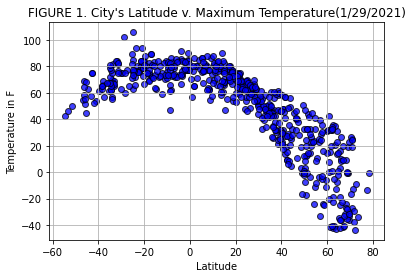

In [32]:
plt.scatter(lats, max_temps, marker="o", facecolors="blue", 
            edgecolors="black", alpha=0.75, 
            label="Cities", linewidths=1)
plt.title("FIGURE 1. City's Latitude v. Maximum Temperature(1/29/2021)")
plt.xlabel("Latitude")
plt.ylabel("Temperature in F")
plt.grid()
plt.savefig("output_data/Lat_Temp_fig1.png")

plt.show()

## Latitude vs. Humidity Plot

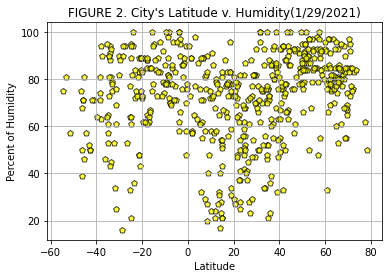

In [35]:
plt.scatter(lats, humidity, marker="p", facecolors="yellow", 
            edgecolors="black", alpha=0.75, 
            label="Cities", linewidths=1)
plt.title("FIGURE 2. City's Latitude v. Humidity(1/29/2021)")
plt.xlabel("Latitude")
plt.ylabel("Percent of Humidity")
plt.grid()
plt.savefig("output_data/Lat_Humidity_fig2.png")

plt.show()

## Latitude vs. Cloudiness Plot

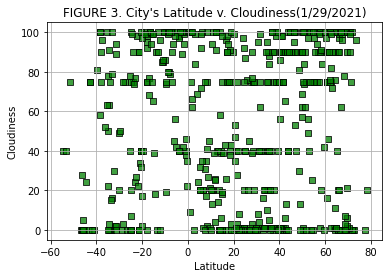

In [34]:
plt.scatter(lats, cloudiness, marker="s", facecolors="green", 
            edgecolors="black", alpha=0.75, 
            label="Cities", linewidths=1)
plt.title("FIGURE 3. City's Latitude v. Cloudiness(1/29/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("output_data/Lat_Cloudiness_fig3.png")

plt.show()

## Latitude vs. Wind Speed Plot

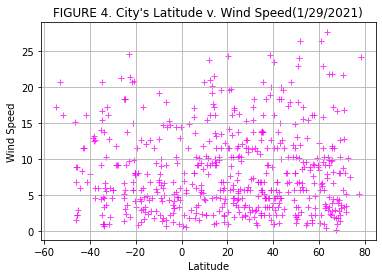

In [36]:
plt.scatter(lats, wind_speed, marker="+", facecolors="fuchsia", 
            edgecolors="black", alpha=0.75, 
            label="Cities", linewidths=1)
plt.title("FIGURE 4. City's Latitude v. Wind Speed(1/29/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("output_data/Lat_WindSpeed_fig4.png")

plt.show()

## Linear Regression

In [109]:
n_hemi_df = clean_city_data_df.loc[(clean_city_data_df["Lat"] >= 0)]
s_hemi_df = clean_city_data_df.loc[(clean_city_data_df["Lat"] <= 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.7623183832716584


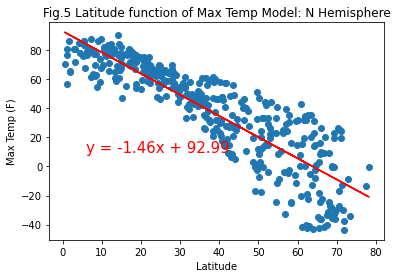

In [123]:
x_values = n_hemi_df["Lat"]
y_values = n_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Fig.5 Latitude function of Max Temp Model: N Hemisphere')
print(f"The r value is: {rvalue**2}")
plt.savefig("output_data/NHemi_Temp_Regr_fig5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.2679121739979668


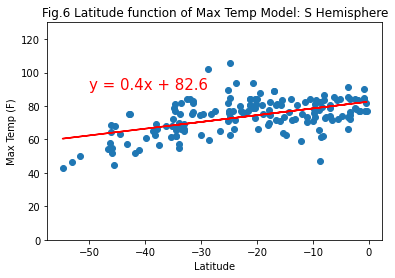

In [165]:
x_values = s_hemi_df["Lat"]
y_values = s_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.ylim(0,130)
plt.title('Fig.6 Latitude function of Max Temp Model: S Hemisphere')
print(f"The r value is: {rvalue**2}")
plt.savefig("output_data/sHemi_Temp_Regr_fig6.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.15444839359461626


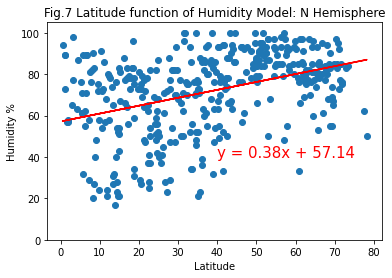

In [167]:
x_values = n_hemi_df["Lat"]
y_values = n_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40), fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.ylim(0,105)
plt.title('Fig.7 Latitude function of Humidity Model: N Hemisphere')
print(f"The r value is: {rvalue**2}")
plt.savefig("output_data/NHemi_Humidity_Regr_fig7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.10011534317373784


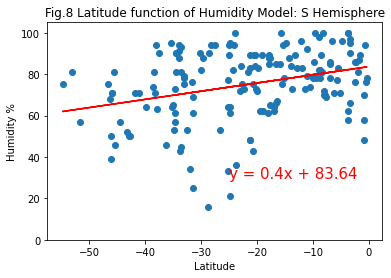

In [168]:
x_values = s_hemi_df["Lat"]
y_values = s_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,30),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.ylim(0,105)
plt.title('Fig.8 Latitude function of Humidity Model: S Hemisphere')
print(f"The r value is: {rvalue**2}")
plt.savefig("output_data/sHemi_Humidity_Regr_fig8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.046445749621739064


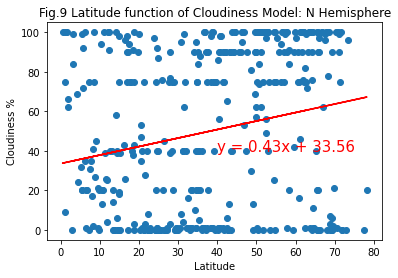

In [149]:
x_values = n_hemi_df["Lat"]
y_values = n_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Fig.9 Latitude function of Cloudiness Model: N Hemisphere')
print(f"The r value is: {rvalue**2}")
plt.savefig("output_data/NHemi_Cloudiness_Regr_fig9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.19254493507796128


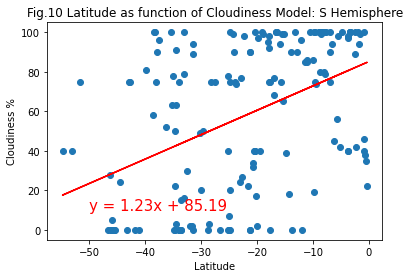

In [146]:
x_values = s_hemi_df["Lat"]
y_values = s_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Fig.10 Latitude as function of Cloudiness Model: S Hemisphere')
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/sHemi_Cloudiness_Regr_fig10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.0003189121318926218


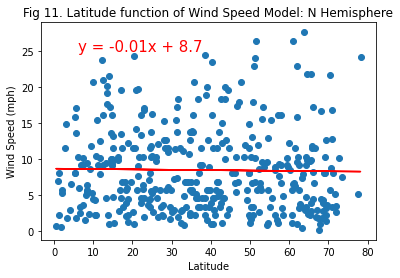

In [140]:
x_values = n_hemi_df["Lat"]
y_values = n_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,25), fontsize=15, color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Fig 11. Latitude function of Wind Speed Model: N Hemisphere')
print(f'The r value is: {rvalue**2}')
plt.savefig("output_data/NHemi_WindSpeed_Regr_fig11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is 0.03059302424080848


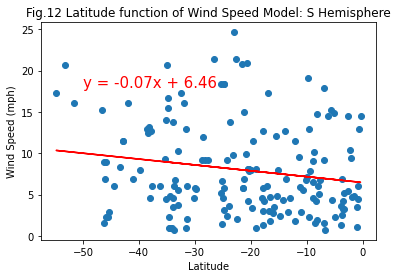

In [144]:
x_values = s_hemi_df["Lat"]
y_values = s_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,18), fontsize=15, color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Fig.12 Latitude function of Wind Speed Model: S Hemisphere')
print(f'The r value is {rvalue**2}')
plt.savefig("output_data/sHemi_WindSpeed_Regr_fig12.png")
plt.show()
